In [173]:
import pandas as pd

In [174]:
data = pd.read_csv('captura-puerto-flota-2010-2018.csv', sep=',', encoding='latin-1')
data.head()

,fecha,flota,puerto,provincia,provincia_id,departamento,departamento_id,latitud,longitud,categoria,especie,especie_agrupada,captura,Unnamed: 13
0,2010-01,Costeros,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Peces,Merluza hubbsi,Merluza hubbsi S41,386114,NaN
1,2010-01,Costeros,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Peces,Pez gallo,otras especies,4367,NaN
2,2010-01,Costeros,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Peces,Rayas nep,Rayas (sin V. Cost),13,NaN
3,2010-01,Rada o ría,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Crustáceos,Centolla,Centolla,48218,NaN
4,2010-01,Rada o ría,Caleta Cordova,Chubut,26,Escalante,26021,-45.748762,-67.377537,Peces,Merluza hubbsi,Merluza hubbsi S41,935,NaN


In [175]:
data.drop(columns=['Unnamed: 13'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41340 entries, 0 to 41339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             41340 non-null  object 
 1   flota             41340 non-null  object 
 2   puerto            41340 non-null  object 
 3   provincia         41340 non-null  object 
 4   provincia_id      41340 non-null  int64  
 5   departamento      41340 non-null  object 
 6   departamento_id   41340 non-null  int64  
 7   latitud           38960 non-null  float64
 8   longitud          38960 non-null  float64
 9   categoria         41340 non-null  object 
 10  especie           41340 non-null  object 
 11  especie_agrupada  41340 non-null  object 
 12  captura           41340 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 4.1+ MB


In [176]:
# Remove rows where 'captura' is not a number
data = data[pd.to_numeric(data['captura'], errors='coerce').notnull()]
data['captura'] = data['captura'].astype(int)

In [177]:
data.isnull().sum()

fecha                  0
flota                  0
puerto                 0
provincia              0
provincia_id           0
departamento           0
departamento_id        0
latitud             2379
longitud            2379
categoria              0
especie                0
especie_agrupada       0
captura                0
dtype: int64

In [178]:
data.drop(columns=['provincia_id','departamento_id'], inplace=True)
data.head()

,fecha,flota,puerto,provincia,departamento,latitud,longitud,categoria,especie,especie_agrupada,captura
0,2010-01,Costeros,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Peces,Merluza hubbsi,Merluza hubbsi S41,386114
1,2010-01,Costeros,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Peces,Pez gallo,otras especies,4367
2,2010-01,Costeros,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Peces,Rayas nep,Rayas (sin V. Cost),13
3,2010-01,Rada o ría,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Crustáceos,Centolla,Centolla,48218
4,2010-01,Rada o ría,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Peces,Merluza hubbsi,Merluza hubbsi S41,935


In [179]:
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m')
data.head()

,fecha,flota,puerto,provincia,departamento,latitud,longitud,categoria,especie,especie_agrupada,captura
0,2010-01-01,Costeros,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Peces,Merluza hubbsi,Merluza hubbsi S41,386114
1,2010-01-01,Costeros,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Peces,Pez gallo,otras especies,4367
2,2010-01-01,Costeros,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Peces,Rayas nep,Rayas (sin V. Cost),13
3,2010-01-01,Rada o ría,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Crustáceos,Centolla,Centolla,48218
4,2010-01-01,Rada o ría,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Peces,Merluza hubbsi,Merluza hubbsi S41,935


In [180]:
data['categoria'].unique()

array(['Peces', 'Crustáceos', 'Moluscos'], dtype=object)

In [181]:
data_centolla = data[data['especie'] =='Centolla']
data_centolla['anio'] = data_centolla['fecha'].dt.year
data_centolla.head()

C:\Users\franf\AppData\Local\Temp\ipykernel_42204\537333504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_centolla['anio'] = data_centolla['fecha'].dt.year


,fecha,flota,puerto,provincia,departamento,latitud,longitud,categoria,especie,especie_agrupada,captura,anio
3,2010-01-01,Rada o ría,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Crustáceos,Centolla,Centolla,48218,2010
5,2010-01-01,Costeros,Caleta Olivia / Paula,Santa Cruz,Deseado,-46.436049,-67.514904,Crustáceos,Centolla,Centolla,6,2010
9,2010-01-01,Rada o ría,Caleta Olivia / Paula,Santa Cruz,Deseado,-46.436049,-67.514904,Crustáceos,Centolla,Centolla,62087,2010
1243,2010-03-01,Congeladores trampas,Puerto Madryn,Chubut,Biedma,-42.723398,-65.033620,Crustáceos,Centolla,Centolla,14335,2010
1424,2010-04-01,Costeros,Caleta Cordova,Chubut,Escalante,-45.748762,-67.377537,Crustáceos,Centolla,Centolla,89961,2010


In [182]:
centolla_anio = data_centolla.groupby('anio')['captura'].sum().reset_index()
centolla_anio.set_index('anio', inplace=True)
centolla_anio

,captura
anio,
2010,6063046
2011,17154981
2012,16664630
2013,7608190
2014,15416598
2015,1202657
2016,1634691
2017,17493813
2018,1510413


In [183]:
centolla_anio['anio_anterior'] = centolla_anio['captura'].shift(1)
centolla_anio['diff'] = centolla_anio['captura'].diff()
centolla_anio['var_porcentual'] = centolla_anio['diff']*100 / centolla_anio['anio_anterior']
centolla_anio.fillna(0, inplace=True)
centolla_anio

,captura,anio_anterior,diff,var_porcentual
anio,,,,
2010,6063046,0.0,0.0,0.000000
2011,17154981,6063046.0,11091935.0,182.943276
2012,16664630,17154981.0,-490351.0,-2.858359
2013,7608190,16664630.0,-9056440.0,-54.345281
2014,15416598,7608190.0,7808408.0,102.631611
2015,1202657,15416598.0,-14213941.0,-92.198947
2016,1634691,1202657.0,432034.0,35.923293
2017,17493813,1634691.0,15859122.0,970.160232
2018,1510413,17493813.0,-15983400.0,-91.366016


In [184]:
data_langostino = data[data['especie'] =='Langostino']
data_langostino['mes'] = data_langostino['fecha'].dt.month
langostino_mes = data_langostino.groupby('mes')['captura'].sum().reset_index()
langostino_mes

C:\Users\franf\AppData\Local\Temp\ipykernel_42204\3596213160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_langostino['mes'] = data_langostino['fecha'].dt.month


,mes,captura
0,1,3209141
1,2,7366672
2,3,32900974
3,4,14184115
4,5,14519912
5,6,27519180
6,7,28947596
7,8,26809238
8,9,42128055
9,10,59429325


<Axes: xlabel='mes'>

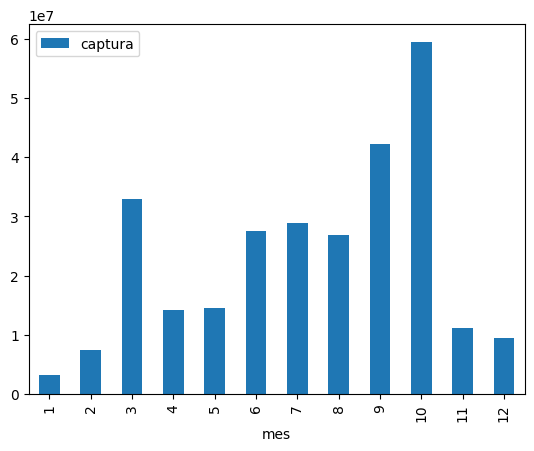

In [185]:
langostino_mes.plot(kind='bar',
                x='mes',
                y='captura')